# Project: TMDb movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#q1">Q1</a></li>
<li><a href="#q2">Q2</a></li>
<li><a href="#q3">Q3</a></li>
<li><a href="#q4">Q4</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This dataset contains information about thousands of movies collected from TMDb

The following questions will be asked

<a href="#q1">Q1: Do movies with higher budge means higher rating ?</a>

<a href="#q2">Q2: Which directors have the highest vote average?</a>

<a href="#q3">Q3: Best runtime for highest vote?</a>

<a href="#q4">Q4: Which month gets the highest vote ?</a>

In [43]:
#Importing needed libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [44]:
# Loading data and quick view
df = pd.read_csv('tmdb-movies.csv', encoding='UTF-8')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [45]:
#Getting some basic info
print('Data Shape value is (Rows, Col)', df.shape)

Data Shape value is (Rows, Col) (10866, 21)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [47]:
#finding NaNs
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [48]:
#Any Duplicates?
df.duplicated().sum()

1

### Data Cleaning 

In [49]:
# Removing some unused columns 
df.drop(['id', 'popularity','imdb_id', 'revenue', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
df.head(1)

,budget,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,150000000,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [50]:
#Removing dups and NaNs
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
#Quick review
print('Number of dupicates is', df.duplicated().sum())
df.isnull().sum()

Number of dupicates is 0


budget                  0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [51]:
#Checking new data 
print('Data Shape value is', df.shape)
df.info()

Data Shape value is (9772, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                9772 non-null   int64  
 1   original_title        9772 non-null   object 
 2   cast                  9772 non-null   object 
 3   director              9772 non-null   object 
 4   runtime               9772 non-null   int64  
 5   genres                9772 non-null   object 
 6   production_companies  9772 non-null   object 
 7   release_date          9772 non-null   object 
 8   vote_count            9772 non-null   int64  
 9   vote_average          9772 non-null   float64
 10  release_year          9772 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 916.1+ KB


<a id='eda'></a>
## Exploratory Data Analysis
<a id='q1'></a>
### Q1: Do movies with higher budge means higher rating ? 

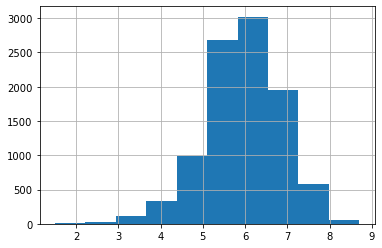

In [52]:
#Lets look at vote_average histogram
df.vote_average.hist();

In [53]:
#Creating copy of the df as we are going to remove rows with zero budget and zero vote_average
df2 = df.copy()
df2 = df2[df2.budget != 0]
df2 = df2[df2.vote_average != 0]

In [54]:
#Lets find the vote_average median, and find the values under the above the median
vta_median = df2['vote_average'].median()
undVa = df2.query('vote_average < {}'.format(vta_median))
abvVa = df2.query('vote_average > {}'.format(vta_median))
#What is the vote_average median
print('vote_average median is',vta_median)
mean_budget_undva = undVa['budget'].mean()
mean_budget_abvva = abvVa['budget'].mean()

vote_average median is 6.1


Text(0, 0.5, 'Average Movie Budget')

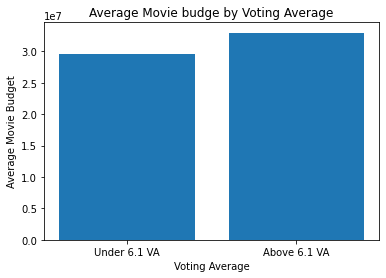

In [55]:
#Drawing a bar chart to find how average movie budge by vote_averages
locations = [1, 2]
heights = [mean_budget_undva, mean_budget_abvva]
labels = ['Under {} VA'.format(vta_median), 'Above {} VA'.format(vta_median)]
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Movie budge by Voting Average')
plt.xlabel('Voting Average')
plt.ylabel('Average Movie Budget')

In [56]:
#Looking for specific numbers
print('Number of movies with VA under {} is'.format(vta_median),len(df2.query('vote_average < 6.0')))
print('Number of movies with VA above {} is'.format(vta_median),len(df2.query('vote_average >= 6.0')))

Number of movies with VA under 6.1 is 2165
Number of movies with VA above 6.1 is 2856


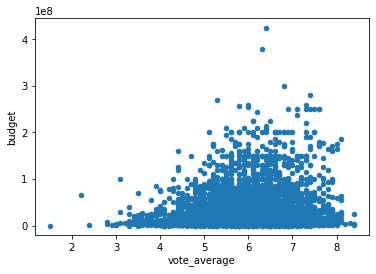

In [57]:
df2.plot(x="vote_average", y="budget", kind="scatter");

>By looking at the above figures, this means the awnser to Q1 is mostly yes.

<a id='q2'></a>
### Q2: Which directors have the highest vote average?

In [58]:
#First lets categorize/bin the vote_average ranges
#Lets start binning!
df['vote_average'].describe()

count    9772.000000
mean        5.963528
std         0.913174
min         1.500000
25%         5.400000
50%         6.000000
75%         6.600000
max         8.700000
Name: vote_average, dtype: float64

In [59]:
#creating the variables from the vote_average description 
va_min = df['vote_average'].describe()['min']
va_25p = df['vote_average'].describe()['25%']
va_50p = df['vote_average'].describe()['50%']
va_75p = df['vote_average'].describe()['75%']
va_max = df['vote_average'].describe()['max']
#bins
bin_edges = [va_min, va_25p, va_50p, va_75p, va_max]
bin_names = ['Under Average' , 'Average', 'Above Average', 'Highest Rating']
#creating columns
df['vote_rating'] = pd.cut(df['vote_average'], bin_edges , labels=bin_names, include_lowest=True)
#Lets see a quick peak
df.head(1)

,budget,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,vote_rating
0,150000000,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,Above Average


In [60]:
df.vote_rating.value_counts()

Under Average     2597
Above Average     2518
Average           2433
Highest Rating    2224
Name: vote_rating, dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   budget                9772 non-null   int64   
 1   original_title        9772 non-null   object  
 2   cast                  9772 non-null   object  
 3   director              9772 non-null   object  
 4   runtime               9772 non-null   int64   
 5   genres                9772 non-null   object  
 6   production_companies  9772 non-null   object  
 7   release_date          9772 non-null   object  
 8   vote_count            9772 non-null   int64   
 9   vote_average          9772 non-null   float64 
 10  release_year          9772 non-null   int64   
 11  vote_rating           9772 non-null   category
dtypes: category(1), float64(1), int64(4), object(6)
memory usage: 925.9+ KB


In [62]:
#changing vote_rating to obj for better ploting
df = df.astype({"vote_rating": str}, errors='raise') 

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                9772 non-null   int64  
 1   original_title        9772 non-null   object 
 2   cast                  9772 non-null   object 
 3   director              9772 non-null   object 
 4   runtime               9772 non-null   int64  
 5   genres                9772 non-null   object 
 6   production_companies  9772 non-null   object 
 7   release_date          9772 non-null   object 
 8   vote_count            9772 non-null   int64  
 9   vote_average          9772 non-null   float64
 10  release_year          9772 non-null   int64  
 11  vote_rating           9772 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 992.5+ KB


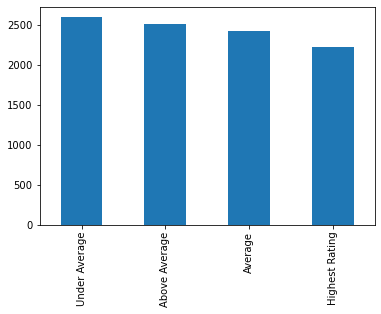

In [64]:
df.vote_rating.value_counts().plot(kind='bar')
plt.show()

In [65]:
df3 = df.copy()
df3.groupby('director')['vote_rating'].value_counts().nlargest(10)

director           vote_rating   
Martin Scorsese    Highest Rating    19
Clint Eastwood     Highest Rating    18
Steven Spielberg   Highest Rating    18
Woody Allen        Highest Rating    17
                   Above Average     16
Steven Soderbergh  Above Average     13
Ron Howard         Above Average     12
Uwe Boll           Under Average     11
Quentin Tarantino  Highest Rating    10
Richard Donner     Above Average     10
Name: vote_rating, dtype: int64

>By looking at the above data, we can see the top 10 directors who have the highest number of votes for this dataset, with their respective rating, for example Martin Scorsese has 19 movies with rating "Highest Rating"

<a id='q3'></a>
### Q3: Best runtime for highest vote?

Mean time:  109.64208633093526


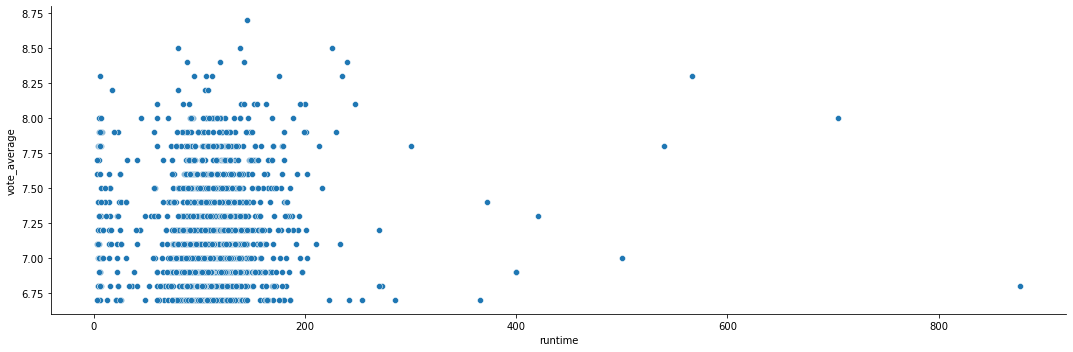

In [66]:
#creat copy from DF, and filter vote_rating column to show movies with rating "Highest rating", showing the mean runtime for those movies
df4 = df.copy()
df4 = df4.loc[df4['vote_rating'] == 'Highest Rating']
print("Mean time: ",df4['runtime'].mean())
sns.relplot(kind='scatter', data=df4, x="runtime", y="vote_average", height=5 , aspect=3)
plt.show()

> By looking at the above we can see the mean runtime for "Highest Rating" moveis is 109 minutes, looking at the plot, we can see most movies have a sub 200 minutes runtime with few outliers.  

In [67]:
#Lets see if we can remove the outliers for a better looking plot
def removeOutliers(temp_df4,threshold):
    temp_df4 = temp_df4[temp_df4['runtime']<threshold]
    return temp_df4
#I have decided to only show movies with runtime under 400 minutes
df4 = removeOutliers(df4,400)

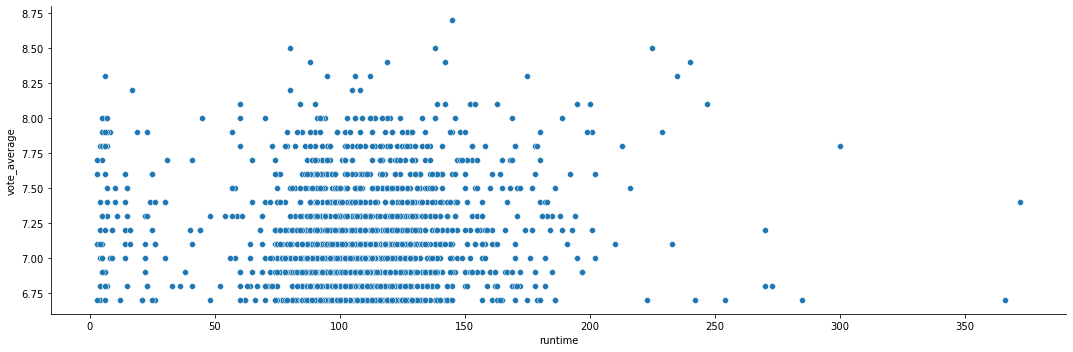

In [68]:
#Lets Draw!
sns.relplot(kind='scatter', data=df4, x="runtime", y="vote_average", height=5 , aspect=3)
plt.show()

>By looking at the above plot, we have a better picture about runtime, were majority of "Highest Rated" moveis fall bettween 60 to 170 minutes, with handful one under 40ish minutes.

<a id='q4'></a>
### Q4: Which month gets the highest vote ?

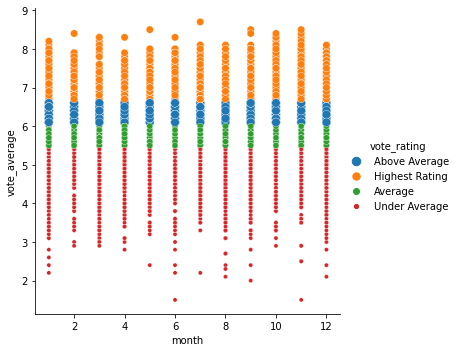

In [69]:
df5 = df.copy()
df5['release_date'] = pd.to_datetime(df5['release_date'])
df5['month'] = df5['release_date'].dt.month
sns.relplot(kind='scatter',x='month', y='vote_average', data=df5, hue='vote_rating', size='vote_rating')
plt.show()

> By looking at the above, its very hard to tell if releasing in a certain month has any future impact on the vote_rating

<a id='conclusions'></a>
## Conclusions

> for Q1: Do movies with higher budge means higher rating ?, the anwaser is mostly yes, as with higher budget = higher production quality, that gives a movie that the audience will enjoy

> for Q2: Which directors have the highest vote average?, shows some industry known names dominate the top of the best vote_rating

> for Q3: Best runtime for highest vote?, sweet spot seems to be around 110 minutes (1.8 Hours)

> for Q4: Which month gets the highest vote ?, very hard to tell which month is the best

**Limitations**
Vote count discrepancy: some movies have vote_count by thousands' and others by hundreds, this has huge impact on the value of vote_average, leading to some form of popularity bias which resualts  in data insight skewness.